<a href="https://colab.research.google.com/github/offthetab/3-JavaClass-/blob/main/%D0%9F%D0%A0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импорт библиотек
import matplotlib.pyplot as plt
from math import log2, ceil
import numpy as np

Этап обработки целочисленных данных (случайное число).


*   Построить вариационный ряд с абсолютными и относительными
частотами по выборке дискретных данных
*   Построить полигон относительных частот вариационного ряда
*   Выписать выражение для эмпирической функции распределения
и построить её график
*   Рассчитать выборочные описательные статистики:
  1.   выборочное среднее
  2.   выборочную дисперсию
  3.   выборочное стандартное отклонение
  4.   выборочную медиану
  5.   коэффициент вариации


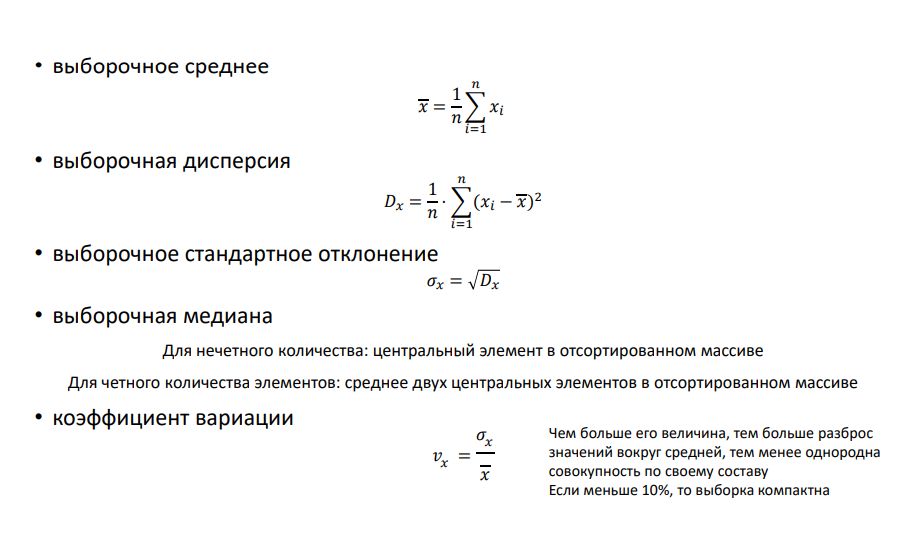


Cлучайное число: [7, 5, 0, 5, 4, 4, 2, 0, 2, 5]


Рост студентов: [178.0, 182.0, 175.0, 176.0, 183.4, 176.0, 186.0, 190.0, 190.0, 185.0]

In [ ]:
# Целочисленные данные
randnum = [7, 5, 0, 5, 4, 4, 2, 0, 2, 5]

In [ ]:
# 1. Построить вариационный ряд с абсолютными и относительными частотами по выборке дискретных данных

variants = list(set(randnum))
var_series = sorted(randnum)
abs_frequency = [randnum.count(i) for i in set(randnum)]
rel_frequency = [round(i / len(randnum), 3) for i in abs_frequency]

print("Варианты зачений:", variants)
print("Вариационный ряд:",var_series)
print("Абсолютная частота", abs_frequency)
print("Относительная частота", rel_frequency)

Варианты зачений: [0, 2, 4, 5, 7]
Вариационный ряд: [0, 0, 2, 2, 4, 4, 5, 5, 5, 7]
Абсолютная частота [2, 2, 2, 3, 1]
Относительная частота [0.2, 0.2, 0.2, 0.3, 0.1]


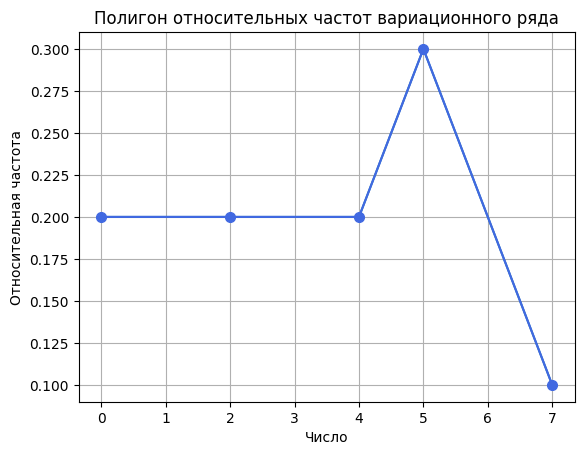

In [ ]:
# 2. Построить полигон относительных частот вариационного ряда

plt.plot(variants, rel_frequency)
plt.plot(variants, rel_frequency, color='royalblue', marker='o', markersize=7)
plt.xlabel('Число')
plt.ylabel('Относительная частота')
plt.title("Полигон относительных частот вариационного ряда")
plt.grid(visible=True)
plt.show()

[0.0, 0.2, 0.4, 0.6, 0.9, 1.0] - частости событий


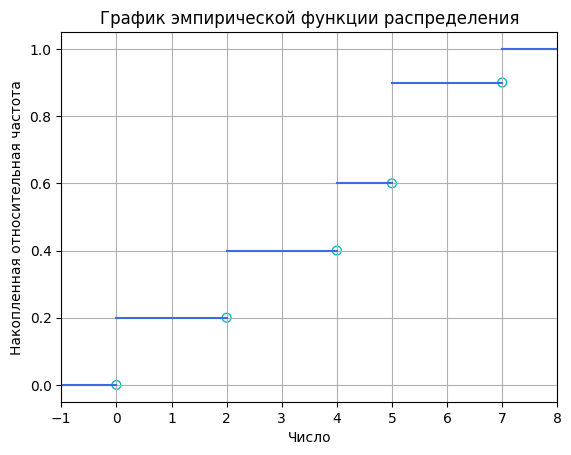

In [ ]:
# 3. Выписать выражение для эмпирической функции распределения и построить её график
result = []
for i in range(len(variants) + 1):  # находим накопленную сумму
    if i == 0:
        result.append(0)
    else:
        result.append((sum(abs_frequency[i - 1:i]) + result[i - 1]))

result = [round(i / sum(abs_frequency), 2) for i in result]  # находим накопленную частотность
print(result, "- частости событий")

for i in range(len(result)):  # отрисовка графика эмпирической функции распределения
    if i == len(result) - 1:
        plt.plot([variants[i - 1], variants[i - 1] + 1], [result[i]] * 2, color="royalblue")
    elif i == 0:
        plt.plot([variants[i] - 1, variants[i]], [result[i]] * 2, color="royalblue")
    else:
        plt.plot([variants[i - 1], variants[i]], [result[i]] * 2, color="royalblue")

plt.scatter(variants, result[:len(result) - 1], s=40, facecolors='none', edgecolors='c')
plt.grid(visible=True)
plt.xlim(variants[0] - 1, variants[-1] + 1)
plt.title("График эмпирической функции распределения")
plt.xlabel('Число')
plt.ylabel('Накопленная относительная частота')
plt.show()

In [ ]:
# 4. Рассчитать выборочные описательные статистики (выборочное среднее, выборочную дисперсию, выборочное стандартное отклонение, выборочную медиану, коэффициент вариации)
randnum = np.array(randnum)

#выборочное среднее
sample_mean = randnum.mean()
print("выборочное среднее:", sample_mean)

#выборочную дисперсию
dispersion = (np.square(randnum - sample_mean)).mean()
print("выборочную дисперсия:",dispersion)

#выборочное стандартное отклонение
standart_deviation = np.sqrt(dispersion)
print("выборочное стандартное отклонение", standart_deviation)

#выборочную медиану центральный элемент или среднее двух центральных
median = np.median(randnum)
print("выборочная медиана", median)

#коэффициент вариации
variation_coefficient = standart_deviation / sample_mean
print("коэффициент вариации", round(variation_coefficient, 3))

выборочное среднее: 3.4
выборочную дисперсия: 4.84
выборочное стандартное отклонение 2.2
выборочная медиана 4.0
коэффициент вариации 0.647


Этап обработки вещественных (непрерывных) данных.

*   Рассчитать число групп (интервалов)  m для квантования исходных данных по правилу Стёрджесса частотами по выборке дискретных данных
*   Вычислить значения m+1 границ групп для значений выборки по правилу фиксированной величины интервала
*   Построить вариационный ряд для выборки интервальных данных
*   Построить гистограмму распределения относительных частот для рассчитанных интервалов выборки
*   Выписать выражение для эмпирической функции распределения, построить её график
*   Рассчитать выборочные описательные статистики:
  1.   выборочное среднее
  2.   выборочную дисперсию
  3.   выборочное стандартное отклонение
  4.   выборочную медиану
  5.   коэффициент вариации


In [ ]:
# Вещественные данные
height = np.array([178.0, 182.0, 175.0, 176.0, 183.4, 176.0, 186.0, 190.0, 190.0, 185.0])

In [ ]:
# 1. Рассчитать число групп (интервалов)  m для квантования исходных данных по правилу Стёрджесса частотами по выборке дискретных данных

m = round(1 + log2(len(height)))  # кол-во интервалов
h = (max(height) - min(height)) / m  # шаг

print("Кол-во интервалов:", m)
print("Длина каждого интервала", h)


Кол-во интервалов: 4
Длина каждого интервала 3.75


In [ ]:
# 2. Вычислить значения m+1 границ групп для значений выборки по правилу фиксированной величины интервала
intervals = [(min(height) - (h / 2)) + (i * h) for i in range(m + 2)]
print("Длина каждого интервала", h)
print("Значения границ групп: ", intervals)

Длина каждого интервала 3.75
Значения границ групп:  [173.125, 176.875, 180.625, 184.375, 188.125, 191.875]


In [ ]:
# 3. Построить вариационный ряд для выборки интервальных данных
int = []
for i, num in enumerate(intervals):
  if(i != len(intervals) - 1):
      int.append([num, intervals[i+1]])
  else:
      break
print("Интервалы:", int)

# Абсолютные частоты
absolute_freq = [0]*len(int)
for num in height:
  for index, interval in enumerate(int):
    if (num >= interval[0] and num < interval[1]):
      absolute_freq[index] += 1
      break

print("Абсолютные частоты:", absolute_freq)

# Относительные частоты
relative_freq = np.array(absolute_freq) / len(height)
print("Относительные частоты:", relative_freq)

Интервалы: [[173.125, 176.875], [176.875, 180.625], [180.625, 184.375], [184.375, 188.125], [188.125, 191.875]]
Абсолютные частоты: [3, 1, 2, 2, 2]
Относительные частоты: [0.3 0.1 0.2 0.2 0.2]


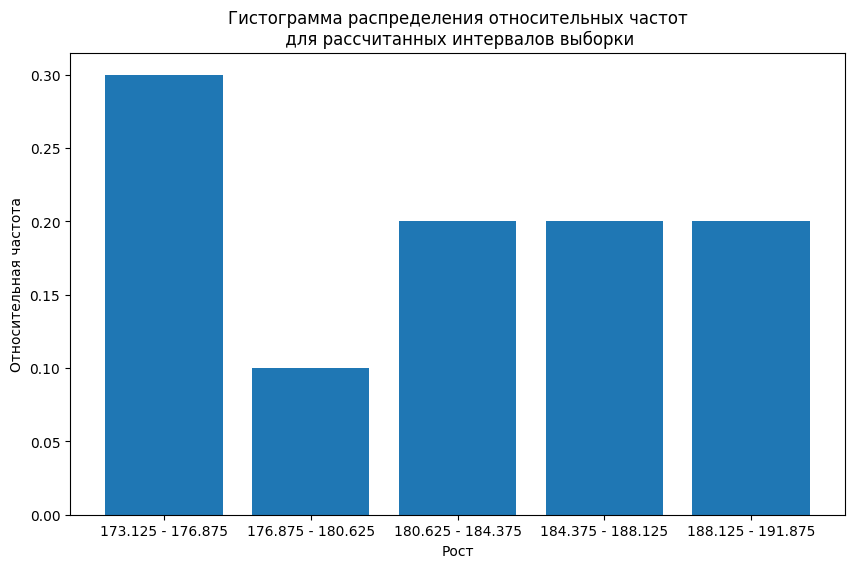

In [ ]:
# 4. Построить гистограмму распределения относительных частот для рассчитанных интервалов выборки
x = np.arange(len(relative_freq))
hist_outpt = ['{a} - {b}'.format(a=i[0], b=i[1]) for i in int]
plt.figure(figsize=(10, 6))
plt.bar(x, height=relative_freq)
plt.title("Гистограмма распределения относительных частот\n для рассчитанных интервалов выборки")
plt.xlabel('Рост')
plt.ylabel('Относительная частота')
plt.xticks(x, hist_outpt)
plt.show()

[0.  0.3 0.4 0.6 0.8 1. ]


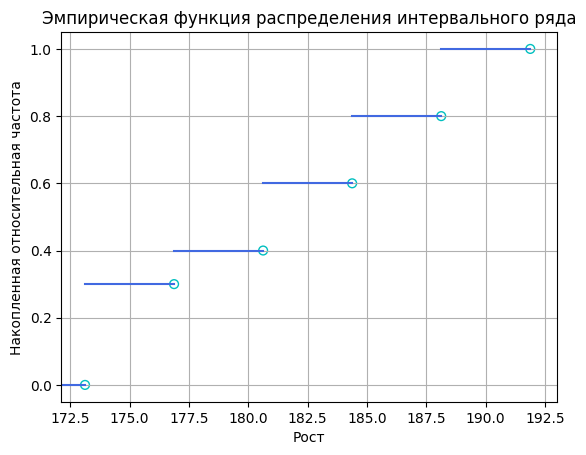

In [ ]:
# 5. Выписать выражение для эмпирической функции распределения, построить её график
Empirical_distribution = np.append([0], np.cumsum(relative_freq))
print(Empirical_distribution)

for i, interval in enumerate(int):
  if (i == 0):
    plt.plot([interval[0] - 4, interval[0]], [Empirical_distribution[i]] * 2, color="royalblue")
    plt.scatter(interval[0], Empirical_distribution[i], s=40, facecolors='none', edgecolors='c')

  plt.plot(interval, [Empirical_distribution[i+1]] * 2, color="royalblue")
  plt.scatter(interval[1], Empirical_distribution[i+1], s=40, facecolors='none', edgecolors='c')

plt.title("Эмпирическая функция распределения интервального ряда")
plt.xlabel('Рост')
plt.ylabel('Накопленная относительная частота')
plt.xlim(int[0][0] - 1)
plt.grid()
plt.show()

In [ ]:
# 6. Рассчитать выборочные описательные статистики (выборочное среднее, выборочную дисперсию, выборочное стандартное отклонение, выборочную медиану, коэффициент вариации)

#выборочное среднее
sample_mean = np.mean(height)
print("выборочное среднее:", round(sample_mean, 2))

#выборочную дисперсию
dispersion = (np.square(height - sample_mean)).mean()
print("выборочную дисперсия:",round(dispersion, 2))

#выборочное стандартное отклонение
standart_deviation = round(np.sqrt(dispersion), 2)
print("выборочное стандартное отклонение", standart_deviation)

#выборочную медиану центральный элемент или среднее двух центральных
median = np.median(height)
print("выборочная медиана", median)

#коэффициент вариации
variation_coefficient = standart_deviation / sample_mean
print("коэффициент вариации", round(variation_coefficient, 3))

выборочное среднее: 182.14
выборочную дисперсия: 29.18
выборочное стандартное отклонение 5.4
выборочная медиана 182.7
коэффициент вариации 0.03
